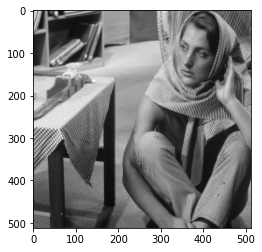

In [1]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data
from core.utils import Mask
import matplotlib.pyplot as plt


DATA_DIR = r".\imgs"

img = load_data(DATA_DIR)[0]

plt.imshow(img, cmap='gray')

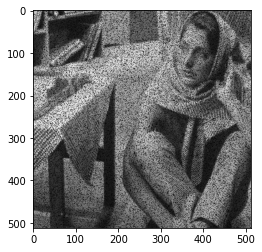

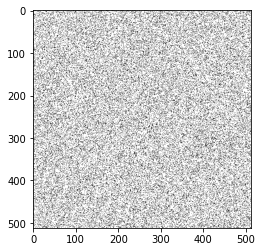

In [3]:
MODE = "random"
mask = Mask(mode=MODE, prcnt=0.8)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()